# __Sales Analysis__



__Importing Libraries__

In [64]:
import pandas as pd
import os         # manipulating folders and file paths, gets all the excel file names including their paths 

__Merging 12 months of sales data into a single file__

In [73]:
#getting only a single month 

df =pd.read_csv(r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [74]:
#to get all excel files from the same directory and folder we use listdir()
#look how it looks like if we use the command 
#we will use list comprehension and a for loops to do that

In [75]:
os.listdir(r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [76]:
files = [file for file in os.listdir(r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

for file in files:
    print(file)
    



Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [77]:
#to get all the csv file concatenated into one single file we need to first have an empty dataframe 
df =pd.read_csv(r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')

files = [file for file in os.listdir(r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]


all_months_data = pd.DataFrame()   #creating an empty dataframe 


for file in files:
    df = pd.read_csv( r'C:\Users\amjad\Desktop\Python Project by Keith Galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/'  +  file)
    all_months_data = pd.concat([all_months_data, df])

#converting our merged dataframe to a csv file

all_months_data.to_csv('all_data.csv', index=False)

__Read In Updated Dataframe__

In [78]:
all_data =pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<span style='color:darkblue '> __What was the best month for sales? How much was earned that month?__</span>

In [79]:
#Before answering the question we need to add a column called "month" 
#the easiest was to do that is to grab the first 2 characters of the "Order Date" column

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [80]:
#now we want to have our month column to be numeric not string so we have to use astype(int32) to convert it

# all_data['Month'] = all_data['Month'].astype('int32') after running this command we get the foloowing error
# ERROR: cannot convert float NaN to integer
#so we need to remove NaN values to make us able to conver

__Finding and getting rid of NaN values__

<span style='color:purple '> __Clean up the data__</span>

In [81]:
nan_df = all_data[all_data.isnull().any(axis=1)]   
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Dropping NaN values__

In [82]:
all_data = all_data.dropna(how = 'all') #this command will drop the rows that all values are nan
# all_data = all_data.dropna(how = 'any') this command will drop the rows if any values are nan (not nececcarily all values)

In [83]:
nan_df = all_data[all_data.isnull().any(axis=1)]    # as it can be seen below the NaN values are now gone
nan_df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [12]:
#now we need to run our conversion from string to numeric again to see if we still encounter an error or not

#all_data['Month'] = all_data['Month'].astype('int32')

#we got a new error as EROOR : "invalid literal for int() with base 10: 'Or' "
#So we guess there might be some 'Or' value in our data so we need to find them and get rid of them or ...

__Find 'Or' and get rid of that__

In [84]:
#we define a temporary dataframe called temp_df to see the rows with the condition below (Have somewhere 'Or')

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']         #we passed in our condition inside the bracket 
temp_df.head()                                                     
#we need to get rid of the following rows by changing our condition above
#in fact those rows that are NOT having the condition above are those will be in our main dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [85]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


__Adding Month column after data cleaning__

In [86]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
#Now it's the time to answer the question below

In [229]:
#to found the best sale we need to multiply the "quantity ordered" column by "Price Each" column

#all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
#all_data.head()

#by running two commands above we got an error ERROR: can't multiply sequence by non-int of type 'str'


__Convert columns to the correct type__

In [87]:
#here we use pd.to_numeric to convert the two following collumns to int and float for price respectively

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [88]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [89]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


__Add a city column__

In [19]:
#we can try split or Apply method
#here we will use apply method to grab city name from "Purchase Address" column and add it as a new column
#basically what .apply() method does it allows us to run any function on our dataframe

In [90]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

all_data.head()                                                                                     # get rid of zipcode

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [ ]:
# another way of using apply method using a function instead of a lambda

def get_city(address):          
    return address.split(',')[1]

def get_state(address):          
    return address.split(',')[2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + '' + get_state(x))

all_data.head()

#If you want to drop a column without saving it to a new data frame you will do the following:

#all_data.drop(columns = 'City', inplace =True)


<span style='color:darkblue '> __Question 1: What was the best month for sales? How much was earned that month?__</span>

In [117]:
#to see what is the best month for sale we need to see the sum for each month
#we will use groupby function 

all_data.groupby('Month').sum()      #December is the best selling month

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


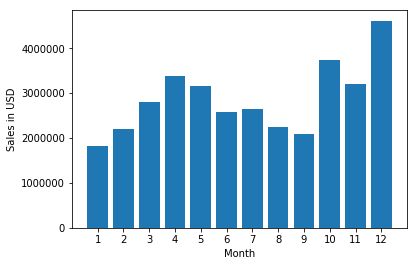

In [92]:
import matplotlib.pyplot as plt

%matplotlib inline 

months = range(1,13)
results = all_data.groupby('Month').sum()

plt.bar(months, results['Sales'])
plt.xticks(months)   #this line will show all the numbers for months
plt.xlabel('Month')
plt.ylabel('Sales in USD')

plt.show()

<span style='color:darkblue '> __Question 2 :What city had the highest number of sales?__</span>

In [93]:
#after adding city as a column now we need to answer the question above 

results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


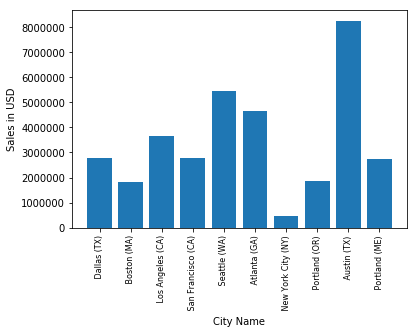

In [94]:

results = all_data.groupby('City').sum()

cities = all_data['City'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size = 8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')

plt.show()

In [ ]:
#there is an issue and that's when you plot the barchart and compare it with dataframe above it you see
#the biggest sale comes from two different cities 
#The issue is the order. When you use .unique() it does not take order into considetarion and it's not the case for plotting
#to resolve the issue we need to use "List Comprehension" to define cities or our x-axis value 

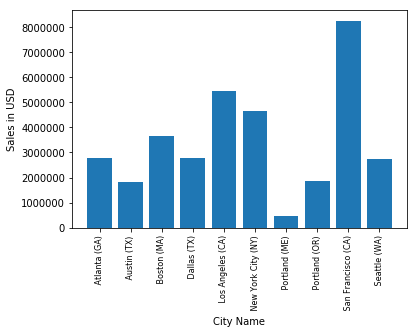

In [95]:
results = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]  #this line make x-axis and y-axis in accordance with each other 

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size = 8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')

plt.show()

<span style='color:darkblue '> __Question 3:What time is the best time to display advertisement to maximize the likelihood of the customers buying the product?__</span>

In [96]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [ ]:
#we can grab the time of the day however we might be careful that the format stays unchanged 
#therefore we convert the order date to datetime object (using datetime library)and make it comfortable to work

In [100]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [101]:
all_data.head()    #now the order date column has become "datetime" format

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [104]:
#Since the column 'Order Date' has become datetime (no longer string) you can call the hour with .dt command
all_data['Hour'] = all_data['Order Date'].dt.hour 
all_data['Minute'] = all_data['Order Date'].dt.minute 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [ ]:
#Now it's the time to do analysis and plotting

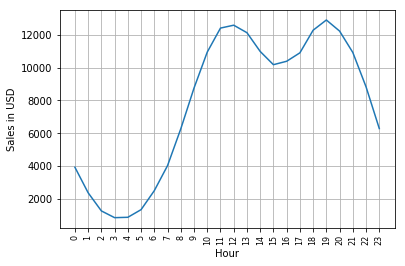

In [112]:
results = all_data.groupby('Hour').count()

Hours = [hour for hour, df in all_data.groupby('Hour')] 
plt.plot(Hours, results['Sales'])
plt.xticks(Hours, rotation ='vertical', size = 8)
plt.grid()  #to visualize the hour and its corresponding sale better
plt.xlabel('Hour')
plt.ylabel('Sales in USD')

plt.show()

#so somewhere around 11am and 6 or 7pm is the best time to put advertisement 

<span style='color:darkblue '> __Question 4 :What products are most often sold together?__</span>

In [131]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [148]:
# to answer this question we need to find those "Order ID" that are the same and first we need to find duplicate "Order ID"

df_tem = all_data[all_data['Order ID'].duplicated(keep=False)] #if you don't put keep =False it only shows one row 
df_tem.head(10)                                                  #out of 2 duplicated rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [ ]:
#SO we will create a column that have items with the same order ID together
#df_tem is our temporary dataframe including duplicated values
#now we want to put simoltanously purchased items in a single column
#we will use groupby() to have the item based on their Order ID and then we will use the 'Product' column and then
#we will transform(similar to apply() method ) the input x (the products that have been ordered together) to join the x
#into a single column

In [151]:
df_tem['Grouped'] =df_tem.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_tem.head()             #it's gonna join the items with the same order ID into a single column using a ',' comma

C:\Users\amjad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [152]:
#since we applied the transform and join on all the duplicated rows we will be having the same rows and should delete them

df_tem = df_tem[['Order ID','Grouped']].drop_duplicates()
df_tem.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
#to realize what products are most often to sale together we need to take a look at the df_tem dataframe above and 
#iterate through the rows and count the pairs that happens often 

In [167]:
from itertools import combinations 
from collections import Counter

count =Counter()

for row in df_tem['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# print(count)   this command will give us a big mess and still brings us the answer 

#count.most_common(10)      #most_common method shows us the top 10 products ordered together 

for key, value in count.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


<span style='color:darkblue '> __Question 5 :What products sold the most? And Why they sold the most?__</span>

In [168]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [218]:
product_group = all_data.groupby('Product')
quantity_ordered =  product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

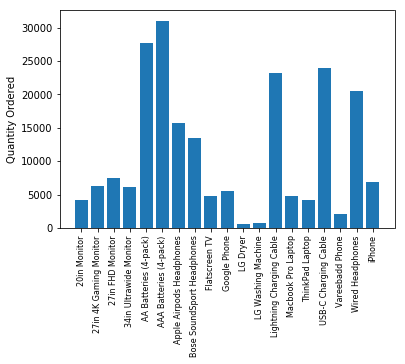

In [223]:
#Graphing Data

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size= 8)
plt.ylabel('Quantity Ordered')
plt.show()

In [ ]:
#the graph above does show that items such as AAA batteries are selling much higher than LG Dryer 
#but we hypothesize that it might be because of the low price they have. SO we need to add the secondary y-axis to make
# a comparison and kinda overlay these two datas on one single profile 


In [224]:
prices = all_data.groupby('Product'). mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

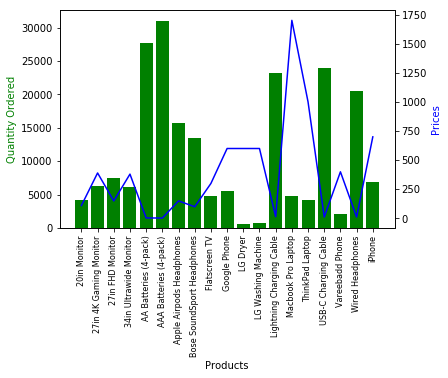

In [230]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation ='vertical', size =8)

plt.show()

#The higher the prices the lower the quantity order 